In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook  
import ugradio

## The Double-sideband Mixer (DSB Mixer)

local oscillator (LO) frequency = 

0 dBm = 0.2236V

In [4]:
vsamp = 62.5e6

In [5]:
vlo = 0.25*62.5e6
dv = 0.05*vlo
vsig1 = vlo + dv
vsig2 = vlo -dv

In [6]:
vlo

15625000.0

In [7]:
dv

781250.0

In [8]:
vsig1

16406250.0

In [9]:
vsig2

14843750.0

In [10]:
plus = np.loadtxt('sigplus')
plus

array([ 12032.,   4864.,  11520., ...,   -768.,  11776.,    512.])

In [11]:
minus = np.loadtxt('sigminus')
minus

array([ 11520.,  -3328.,  11776., ...,  -4096.,   4608.,  -4608.])

## Power/Voltage Spectra Functions

In [12]:
def voltage_spectrum(data):
    """
    Input:  data: array of signals
    Output: freqs: x-axis of frequencies
            real: real portion of voltage
            imaginary: imaginary portion of voltage
    """
    ft = np.fft.fft(data)
    real = ft.real
    imaginary = ft.imag
    freqs = np.fft.fftfreq(len(data))
    return freqs, real, imaginary

In [13]:
def plot_voltage(freqs, real, imag, name):
    """
    Input: freqs: x-axis of frequencies
           real: real portion of voltage
           imag: imaginary portion of voltage
           name: title of the plot
    Output: voltage spectrum
    """
    shifted_real = np.fft.fftshift(real)
    shifted_imag = np.fft.fftshift(imag)
    shifted_freq = np.fft.fftshift(freqs)
    plt.plot(shifted_freq, shifted_real, 'b-.', label='real')
    plt.plot(shifted_freq, shifted_imag, 'g-', label='imaginary')
    plt.title('Voltage Spectrum at '+name)
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Voltage')
    plt.legend()
    plt.show()

In [14]:
def power_spectrum(data):
    """
    Input: data: array of signals
    Output: freqs: x-axis of frequencies
            power: squared abs(voltage)
    """
    ft = np.fft.fft(data)
    power = abs(ft)**2
    freqs = np.fft.fftfreq(len(data))
    return freqs, power

In [15]:
def plot_power(freqs, power, name):
    """
    Input: freqs: x-axis of frequencies
           power: array of powers
           name: title of the plot
    Output: power spectrum
    """
    plt.plot(freqs, power)
    plt.title('Power Spectrum at '+name)
    plt.ylabel('Power')
    plt.xlabel('Frequency (MHz)')
    plt.show()

## Power Spectra

<IPython.core.display.Javascript object>


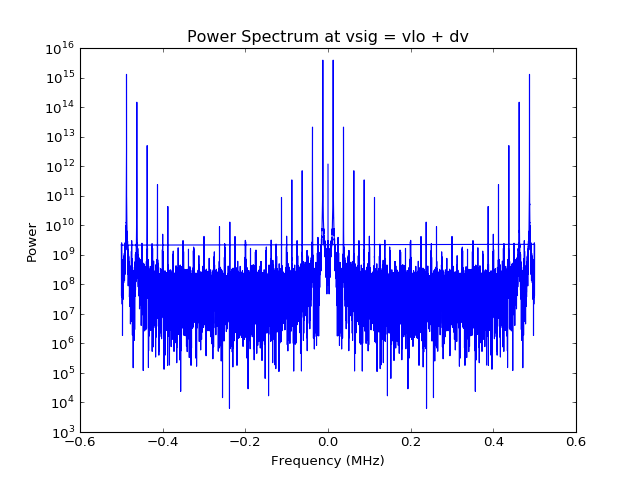

In [113]:
#power spectrum of vsig = vlo + dv
x = power_spectrum(plus)
plot_power(x[0], x[1], "vsig = vlo + dv")

<IPython.core.display.Javascript object>


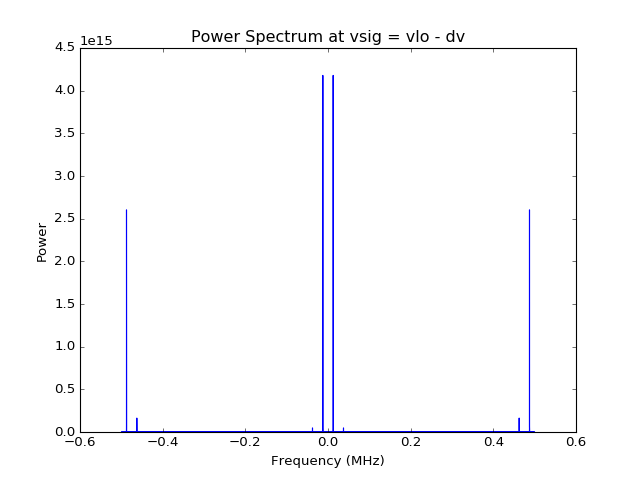

In [24]:
#power spectrum of vsig = vlo - dv
y = power_spectrum(minus)
plot_power(y[0], y[1], "vsig = vlo - dv")

## Plot waveform

In [18]:
# Total time for collection 
timetot = len(plus)/62.5e6
time = np.linspace(0, timetot, len(plus))
time

array([  0.00000000e+00,   1.60010001e-08,   3.20020001e-08, ...,
         2.55967998e-04,   2.55983999e-04,   2.56000000e-04])

In [19]:
plt.plot(time[0:200], plus[:200])
plt.title('Waveform at vsig = vlo + dv')

## Voltage spectrum

<IPython.core.display.Javascript object>


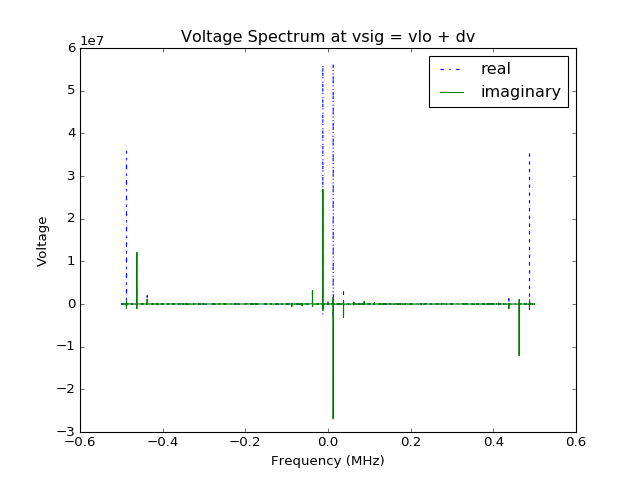

In [26]:
plus_voltage = voltage_spectrum(plus)
plot_voltage(plus_voltage[0], plus_voltage[1], plus_voltage[2], "vsig = vlo + dv")

In [32]:
plus_voltage

(array([  0.00000000e+00,   6.25000000e-05,   1.25000000e-04, ...,
         -1.87500000e-04,  -1.25000000e-04,  -6.25000000e-05]),
 array([ 1076736.       ,    20323.5342138,   -19804.3130704, ...,
          -54180.5049588,   -19804.3130704,    20323.5342138]),
 array([     0.        , -37881.43221463,  -2727.72554046, ...,
          -103.12555005,   2727.72554046,  37881.43221463]))

In [31]:
plt.plot(time[0:150], minus[:150])

TypeError: 'ascending' is an invalid keyword argument for this function

In [103]:
ft = np.fft.fft(plus)

In [104]:
sortedft = sorted(ft, key = lambda x: np.abs(x)**2)

In [105]:
sortedft[-2]

(56165918.155323699+26922448.751888581j)

In [107]:
for i in range (0,len(ft)):
    if (ft[i]==sortedft[-3]) or (ft[i] == sortedft[-4]):
        ft[i]=0
        print(i)

7800
8200


In [108]:
ift = np.fft.ifft(ft)

<IPython.core.display.Javascript object>


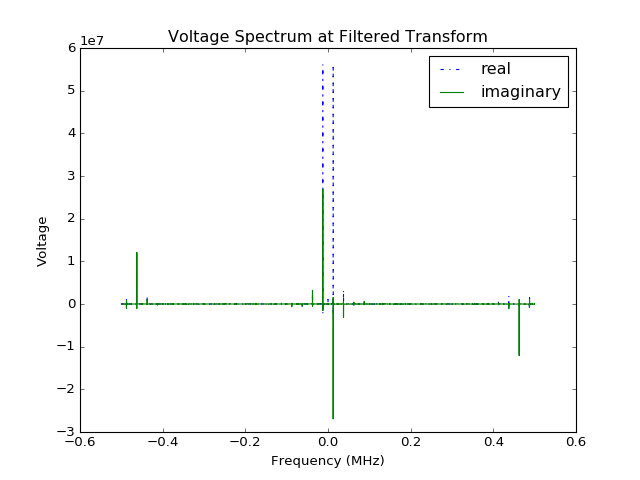

In [111]:
filt_voltage = voltage_spectrum(ift)
plot_voltage(filt_voltage[0], filt_voltage[1], filt_voltage[2], "Filtered Transform")

<IPython.core.display.Javascript object>


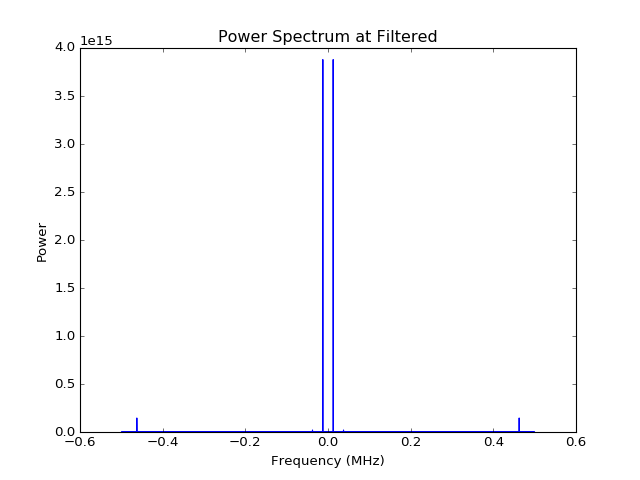

In [112]:
pift = power_spectrum(ift)
plot_power(pift[0], pift[1], 'Filtered')